<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preamble" data-toc-modified-id="Preamble-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preamble</a></span><ul class="toc-item"><li><span><a href="#Load-libraries-and-settings" data-toc-modified-id="Load-libraries-and-settings-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load libraries and settings</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Generate-cued-trajectory" data-toc-modified-id="Generate-cued-trajectory-1.2.0.1"><span class="toc-item-num">1.2.0.1&nbsp;&nbsp;</span>Generate cued trajectory</a></span></li><li><span><a href="#generate-trajectory" data-toc-modified-id="generate-trajectory-1.2.0.2"><span class="toc-item-num">1.2.0.2&nbsp;&nbsp;</span>generate trajectory</a></span></li><li><span><a href="#Generate-non-cued-trajectories" data-toc-modified-id="Generate-non-cued-trajectories-1.2.0.3"><span class="toc-item-num">1.2.0.3&nbsp;&nbsp;</span>Generate non-cued-trajectories</a></span></li><li><span><a href="#Build-covariance-matrix" data-toc-modified-id="Build-covariance-matrix-1.2.0.4"><span class="toc-item-num">1.2.0.4&nbsp;&nbsp;</span>Build covariance matrix</a></span></li><li><span><a href="#Determine-winner-from-sample" data-toc-modified-id="Determine-winner-from-sample-1.2.0.5"><span class="toc-item-num">1.2.0.5&nbsp;&nbsp;</span>Determine winner from sample</a></span></li><li><span><a href="#Generate-samples" data-toc-modified-id="Generate-samples-1.2.0.6"><span class="toc-item-num">1.2.0.6&nbsp;&nbsp;</span>Generate samples</a></span></li><li><span><a href="#Calculate-probabilities" data-toc-modified-id="Calculate-probabilities-1.2.0.7"><span class="toc-item-num">1.2.0.7&nbsp;&nbsp;</span>Calculate probabilities</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Noisy-trajectories" data-toc-modified-id="Noisy-trajectories-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Noisy trajectories</a></span><ul class="toc-item"><li><span><a href="#Single-calculations" data-toc-modified-id="Single-calculations-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Single calculations</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Single-comparison" data-toc-modified-id="Single-comparison-2.1.0.1"><span class="toc-item-num">2.1.0.1&nbsp;&nbsp;</span>Single comparison</a></span></li><li><span><a href="#Calculations-for-cued-samples" data-toc-modified-id="Calculations-for-cued-samples-2.1.0.2"><span class="toc-item-num">2.1.0.2&nbsp;&nbsp;</span>Calculations for cued samples</a></span></li><li><span><a href="#Bootrstap-for-cued-version" data-toc-modified-id="Bootrstap-for-cued-version-2.1.0.3"><span class="toc-item-num">2.1.0.3&nbsp;&nbsp;</span>Bootrstap for cued version</a></span></li><li><span><a href="#Calculations-for-non-cued-version" data-toc-modified-id="Calculations-for-non-cued-version-2.1.0.4"><span class="toc-item-num">2.1.0.4&nbsp;&nbsp;</span>Calculations for non-cued version</a></span></li></ul></li></ul></li><li><span><a href="#Systematic-calculations-for-initial-cue" data-toc-modified-id="Systematic-calculations-for-initial-cue-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Systematic calculations for initial cue</a></span></li><li><span><a href="#Systematic-calculations-for-non-initial-cue" data-toc-modified-id="Systematic-calculations-for-non-initial-cue-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Systematic calculations for non-initial cue</a></span></li></ul></li><li><span><a href="#Probability-of-failure-for-a-given-set-of-weights" data-toc-modified-id="Probability-of-failure-for-a-given-set-of-weights-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Probability of failure for a given set of weights</a></span></li><li><span><a href="#Graphical-representation" data-toc-modified-id="Graphical-representation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Graphical representation</a></span></li></ul></div>

# Preamble


## Load libraries and settings

In [1]:
import  pprint
import  subprocess 
import sys 
sys.path.append('../')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)

np.set_printoptions(suppress=True, precision=5)

sns.set(font_scale=2.5)

from network import Protocol, NetworkManager, Network
from patterns_representation import PatternsRepresentation
from analysis_functions import calculate_persistence_time, calculate_recall_quantities, deterministic_solution
from plotting_functions import plot_weight_matrix, plot_network_activity_angle, plot_persistent_matrix

epsilon = 10e-80
vmin = -10.0

## Functions

#### Generate cued trajectory

In [2]:
def generate_cued_trajectory(manager, T_cue, T_recall):
    dt = manager.dt
    tau_a = manager.nn.tau_a
    tau_s = manager.nn.tau_s
    g_I = manager.nn.g_I
    g_a = manager.nn.g_a
    
    unit_active = True
    s0 = g_I + manager.nn.w[0, 0]
    beta = manager.nn.beta[0]
    w = manager.nn.w[0, 0]
    a0 = 0.0
    time_cue = np.arange(0, T_cue, dt)
    s_theo1 = deterministic_solution(time_cue, beta, w + g_I, tau_s, tau_a, g_a, s0, a0, unit_active)
    s0 = s_theo1[-1]
    recall_time = np.arange(0, T_recall, dt)
    s_theo2 = deterministic_solution(recall_time, beta, w, tau_s, tau_a, g_a, s0, a0, unit_active)
    s_theo = np.hstack((s_theo1, s_theo2))
    
    return s_theo

#### generate trajectory

In [3]:
def generate_trajectory_initial(manager, index):
    unit_active = False
    beta = manager.nn.beta[index]
    tau_a = manager.nn.tau_a
    tau_s = manager.nn.tau_s
    g_a = manager.nn.g_a
    
    a0 = 0.0
    s0 = manager.nn.w[index, 0]
    w = manager.nn.w[index, 0]
    
    return deterministic_solution(manager.time, beta, w, tau_s, tau_a, g_a, s0, a0, unit_active)

#### Generate non-cued-trajectories

In [4]:
def generate_non_cued_trajectories(manager, n_signals):
    signals = []

    base_index = 0
    a0 = 0
    tau_s = manager.nn.tau_s
    tau_a = manager.nn.tau_a
    g_a = manager.nn.g_a
    
    for index in range(n_signals):
        w = manager.nn.w[index, base_index]
        beta = manager.nn.beta[index]
        s0 = manager.nn.w[index + 1, base_index]
        if index == base_index:
            unit_active = True
        else:
            unit_active = False

        s = deterministic_solution(manager.time, beta, w, tau_s, tau_a, g_a, s0, a0, unit_active)
        
        signals.append(s)
        
    return signals

#### Build covariance matrix

In [5]:
def covariance(t1, t2, tau_s, sigma_in):
    factor = 0.5 * tau_s * sigma_in **2
    diff = np.abs(t1 - t2)
    addition = t1 + t2
    
    return factor * (np.exp(-diff / tau_s) + np.exp(-addition / tau_s))

#### Determine winner from sample

In [6]:
def determine_sample_winner(sample_s0, sample_s1, sample_s2):

    success_points = np.where(sample_s0 < sample_s1)[0]
    failure_points = np.where(sample_s0  < sample_s2)[0]
    n_success = success_points.size
    n_failure = failure_points.size

    success = 0.0
    point = sample_s0.size
    
    if n_success > 0.0 or n_failure > 0.0:
        # If you have not failures it meant it was success
        if n_failure == 0:
            success = 1.0
            point = success_points[0]
        # Else we have the two and we compare
        elif n_success == 0:
            success = 2.0
            point = failure_points[0]
        # If you have not success and only failures (unlikely)
        else:
            if success_points[0] <= failure_points[0]:
                success = 1.0
                point = success_points[0]
            else:
                success = 2.0
                point = failure_points[0]
        
    return success, point

#### Generate samples

In [7]:
def generate_samples(manager, sigma_out, n_samples, n_signals):
    
    tau_s = manager.nn.tau_s
    s0 = manager.history['s'][:, 0]
    
    # Generate the covariance
    time = manager.time
    nt = time.size
    time1, time2 = np.meshgrid(time, time)
    cov_simple = np.zeros((nt, nt))
    sigma_in = sigma_out * np.sqrt(2 / tau_s)
    cov = covariance(time1, time2, tau_s, sigma_in)
    mean = s0
    rv = sp.stats.multivariate_normal(mean=mean, cov=cov)
    
    # Store the samples
    samples_dictionary = {}
    samples_dictionary['s0'] = rv.rvs(size=n_samples)
    for index in range(1, n_signals):
        rv.mean = manager.history['s'][:, index]
        samples_dictionary['s' + str(index)] = rv.rvs(size=n_samples)
    
    return samples_dictionary

In [8]:
def generate_samples_from_signals(manager, sigma_out, n_samples, n_signals, signals=None):
    
    tau_s = manager.nn.tau_s
    if signals is None:
        s0 = manager.history['s'][:, 0]
        signals = [s0]
        for index in range(1, n_signals):
            signals.append(manager.history['s'][:, index])
    else:
        s0 = signals[0]
    
    # Generate the covariance
    time = manager.time
    nt = time.size
    time1, time2 = np.meshgrid(time, time)
    cov_simple = np.zeros((nt, nt))
    sigma_in = sigma_out * np.sqrt(2 / tau_s)
    cov = covariance(time1, time2, tau_s, sigma_in)
    mean = s0
    rv = sp.stats.multivariate_normal(mean=mean, cov=cov)
    
    # Store the samples
    samples_dictionary = {}
    samples_dictionary['s0'] = rv.rvs(size=n_samples)
    
    for index in range(1, n_signals):
        rv.mean = signals[index]
        samples_dictionary['s' + str(index)] = rv.rvs(size=n_samples)
    
    return samples_dictionary

#### Calculate probabilities

In [9]:
def calculate_probabilities(samples_dictionary):
    s0 = samples_dictionary['s0']
    s1 = samples_dictionary['s1']
    s2 = samples_dictionary['s2']
    n_samples = s0.shape[0]
    
    winners = np.zeros(n_samples)
    points = np.zeros(n_samples)

    for index in range(n_samples):
        s0_sample = samples_dic['s0']
        winner, point = determine_sample_winner(s0[index], s1[index], s2[index])
        winners[index] = winner
        points[index] = point

    p_success = np.sum(winners == 1.0) / n_samples
    p_stay = np.sum(winners == 0.0) / n_samples
    p_fail = np.sum(winners == 2.0) / n_samples
    
    probabilities_dic = {'p_success': p_success, 'p_stay': p_stay, 'p_fail': p_fail}
    
    return probabilities_dic

# Noisy trajectories

## Single calculations

#### Single comparison
Here we will compare the trajectory produced by our deterministic solution plus some noise with the one from the simulation. 

In [10]:
strict_maximum = True

g_a = 1.0
g_I = 1.0
tau_a = 0.250
G = 100.0
sigma_out = 0.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.005

hypercolumns = 1
minicolumns = 5
n_patterns = 5

# Training
ws = 1.0
wn = 0.0
wb = -20.0
alpha = 1.0

T_persistence = 0.100


# Manager properties
dt = 0.001
values_to_save = ['o', 's']

# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
                 tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
                 strict_maximum=strict_maximum, perfect=False, normalized_currents=True)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Protocol
manager.run_artificial_protocol(ws=ws, wn=wn, wb=wb ,alpha=alpha)

manager.set_persistent_time_with_adaptation_gain(T_persistence=T_persistence)
T_recall = T_persistence - tau_s
T_cue = tau_s
I_cue = 0
nr = manager.canonical_network_representation
aux = calculate_recall_quantities(manager, nr, T_recall, T_cue, remove=0.009, reset=True, empty_history=True)
success, pattern_sequence, persistent_times, timings = aux

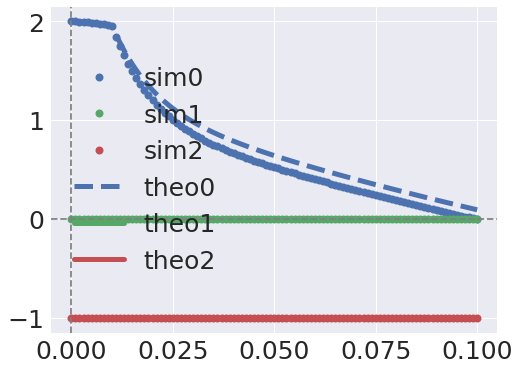

In [11]:
s0 = manager.history['s'][:, 0]
s1 = manager.history['s'][:, 1]
s2 = manager.history['s'][:, 2]
s3 = manager.history['s'][:, 3]
s4 = manager.history['s'][:, 4]

s_theo0 = generate_cued_trajectory(manager, T_cue, T_recall)
s_theo1 = generate_trajectory_initial(manager, 1)
s_theo2 = generate_trajectory_initial(manager, 2)

colors = sns.color_palette()

lw = 5
ms = 8

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(manager.time, s0, 'o', color=colors[0], lw=lw, ms=ms, label='sim0')
ax.plot(manager.time, s1, 'o', color=colors[1], lw=lw,  ms=ms, label='sim1')
ax.plot(manager.time, s2, 'o', color=colors[2], lw=lw, ms=ms, label='sim2')
#ax.plot(manager.time, s3, 'o', color=colors[3], lw=lw, ms=ms, label='sim3')
#|ax.plot(manager.time, s4, 'o', color=colors[4], lw=lw, ms=ms, label='sim4')


ax.plot(manager.time, s_theo0, '--', color=colors[0], lw=lw, ms=ms, label='theo0')
ax.plot(manager.time, s_theo1, '-', color=colors[1], lw=lw, ms=ms, label='theo1')
ax.plot(manager.time, s_theo2, '-', color=colors[2], lw=lw, ms=ms, label='theo2')


ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.legend();

#### Calculations for cued samples

In [12]:
%%time
time = manager.time
nt = time.size
time1, time2 = np.meshgrid(time, time)
cov_simple = np.zeros((nt, nt))
sigma_out = 1.0
sigma_in = sigma_out * np.sqrt(2 / manager.nn.tau_s)
cov = covariance(time1, time2, tau_s, sigma_in)
mean = s0[:nt]
rv = sp.stats.multivariate_normal(mean=mean, cov=cov)

CPU times: user 8 ms, sys: 4 ms, total: 12 ms
Wall time: 13.4 ms


In [13]:
%%time
n_samples = 500
s0_samples = rv.rvs(size=n_samples)
rv.mean = np.ones(nt) * manager.nn.w[1, 0]
s1_samples = rv.rvs(size=n_samples)
rv.mean = np.ones(nt) * manager.nn.w[2, 0]
s2_samples = rv.rvs(size=n_samples)

CPU times: user 56 ms, sys: 0 ns, total: 56 ms
Wall time: 44.9 ms


In [14]:
print('variance theoretical', cov[-1, -1])
print('variance empirical', s0_samples[:, -1].var())
print('variance of the neural network', sigma_out ** 2)

variance theoretical 1.000000002061154
variance empirical 1.0746604903039918
variance of the neural network 1.0


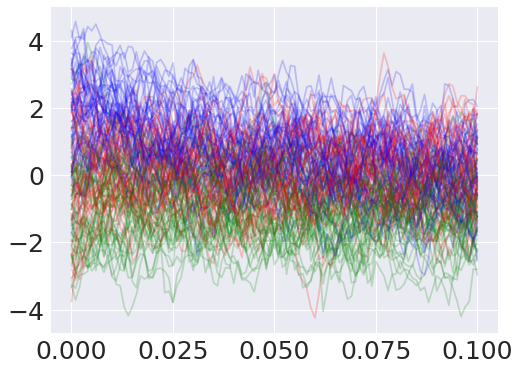

In [15]:
plot_number = min(n_samples, 50)
for index in range(plot_number):
    plt.plot(time, s0_samples[index], color='blue', alpha=0.2)
    plt.plot(time, s1_samples[index], color='red', alpha=0.2)
    plt.plot(time, s2_samples[index], color='green', alpha=0.2)

Determine type of failure

478


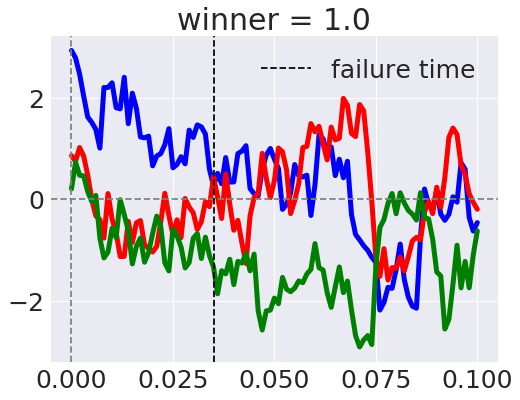

In [16]:
index = np.random.randint(0, n_samples)
print(index)
aux = determine_sample_winner(s0_samples[index], s1_samples[index], s2_samples[index])
winner, point = aux 

lw = 5

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(time, s0_samples[index], color='blue', lw=lw, alpha=1.0)
ax.plot(time, s1_samples[index], color='red', lw=lw, alpha=1.0)
ax.plot(time, s2_samples[index], color='green', lw=lw, alpha=1.0)

ax.set_title('winner = ' + str(winner))
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.axvline(point * dt, ls='--', color='black', label='failure time')
ax.legend();

Now let's calculate this for the whole sample

In [17]:
winners = np.zeros(n_samples)
points = np.zeros(n_samples)

for index in range(n_samples):
    aux = determine_sample_winner(s0_samples[index], s1_samples[index], s2_samples[index])
    winner, point = aux
    winners[index] = winner
    points[index] = point

p_success = np.sum(winners == 1.0) / n_samples
p_stay = np.sum(winners == 0.0) / n_samples
p_fail = np.sum(winners == 2.0) / n_samples

print(f'p_success = {p_success:5.5f}, p_stay = {p_stay:5.5f}, p_fail= {p_fail:5.5f}')

p_success = 0.81800, p_stay = 0.00000, p_fail= 0.18200


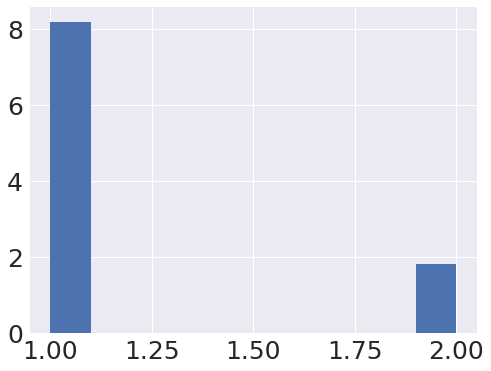

In [18]:
plt.hist(winners, density=True);

#### Bootrstap for cued version
First an example

In [19]:
sigma_out = 1.0
n_samples = 1000
n_signals = 3
samples_dic = generate_samples(manager, sigma_out, n_samples, n_signals)
calculate_probabilities(samples_dic)

{'p_fail': 0.168, 'p_stay': 0.0, 'p_success': 0.832}

In [20]:
%%time
sigma_out = 1.0
sim_num = 10
n_samples = 1000
n_signals = 3
p_fail_vector = np.zeros(sim_num)
p_stay_vector = np.zeros(sim_num)
p_success_vector = np.zeros(sim_num)
for index in range(sim_num):
    samples_dic = generate_samples(manager, sigma_out, n_samples, n_signals)
    prob_dic = calculate_probabilities(samples_dic)
    p_fail_vector[index]= prob_dic['p_fail']
    p_stay_vector[index]= prob_dic['p_stay']
    p_success_vector[index]= prob_dic['p_success']

CPU times: user 852 ms, sys: 8 ms, total: 860 ms
Wall time: 505 ms


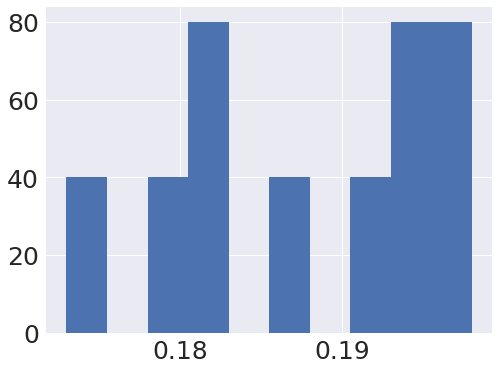

In [21]:
plt.hist(p_fail_vector, density=True, stacked=True);

(0, 1)

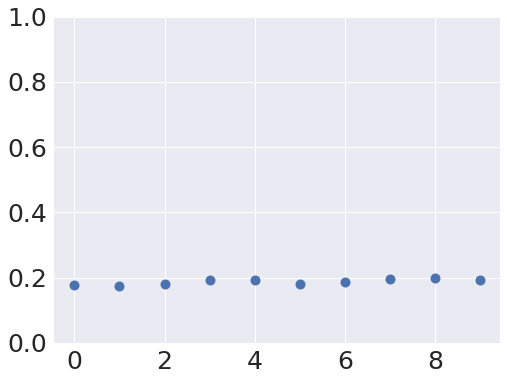

In [22]:
plt.plot(p_fail_vector, 'o', ms=10)
plt.ylim([0, 1])

In [23]:
p_fail_vector.mean()

0.1873

In [24]:
p_stay_vector.std()

0.0009797958971132714

#### Calculations for non-cued version

In [25]:
strict_maximum = True

g_a = 1.0
g_I = 1.0
tau_a = 0.250
G = 100.0
sigma_out = 0.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.005

hypercolumns = 1
minicolumns = 5
n_patterns = 5

# Training
ws = 1.5
wn = -1.0
wb = -20.0
alpha = 1.0

T_persistence = 0.050


# Manager properties
dt = 0.0001
values_to_save = ['o', 's']

# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
                 tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
                 strict_maximum=strict_maximum, perfect=False, normalized_currents=True)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Protocol
manager.run_artificial_protocol(ws=ws, wn=wn, wb=wb ,alpha=alpha)

manager.set_persistent_time_with_adaptation_gain(T_persistence=T_persistence)
T_recall = T_persistence - tau_s
T_cue = tau_s
I_cue = 0
nr = manager.canonical_network_representation

aux = calculate_recall_quantities(manager, nr, T_recall, T_cue, remove=0.009, reset=True, empty_history=True)

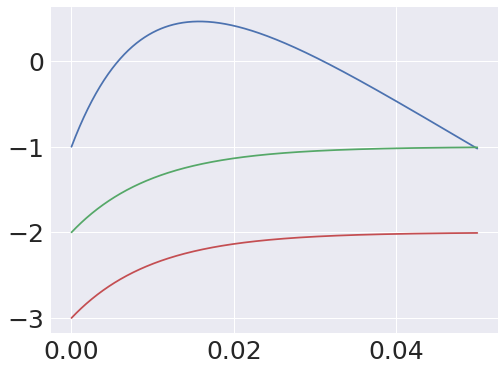

In [26]:
signals = generate_non_cued_trajectories(manager, 3)
for signal in signals:
    plt.plot(manager.time, signal)

In [27]:
sigma_out = 1.0
n_samples = 1000
n_signals = 3
samples_dic = generate_samples_from_signals(manager, sigma_out, n_samples, n_signals, signals=signals)
calculate_probabilities(samples_dic)

{'p_fail': 0.183, 'p_stay': 0.025, 'p_success': 0.792}

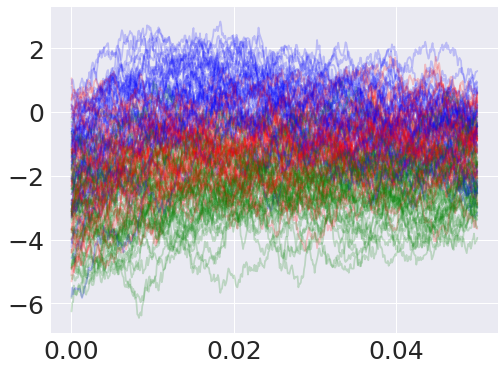

In [28]:
s0_samples = samples_dic['s0']
s1_samples = samples_dic['s1']
s2_samples = samples_dic['s2']
time = manager.time

plot_number = min(n_samples, 50)
for index in range(plot_number):
    plt.plot(time, s0_samples[index], color='blue', alpha=0.2)
    plt.plot(time, s1_samples[index], color='red', alpha=0.2)
    plt.plot(time, s2_samples[index], color='green', alpha=0.2)

823


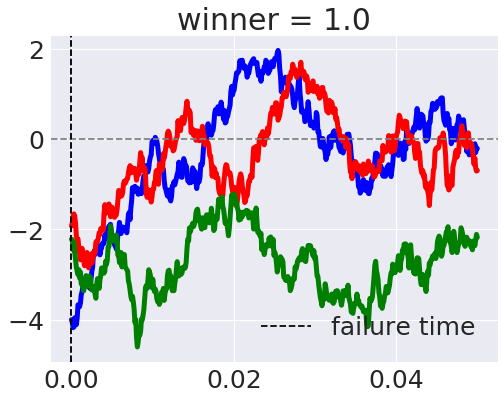

In [29]:
index = np.random.randint(0, n_samples)
print(index)
aux = determine_sample_winner(s0_samples[index], s1_samples[index], s2_samples[index])
winner, point = aux 

lw = 5

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(time, s0_samples[index], color='blue', lw=lw, alpha=1.0)
ax.plot(time, s1_samples[index], color='red', lw=lw, alpha=1.0)
ax.plot(time, s2_samples[index], color='green', lw=lw, alpha=1.0)

ax.set_title('winner = ' + str(winner))
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.axvline(point * dt, ls='--', color='black', label='failure time')
ax.legend();

## Systematic calculations for initial cue

In [30]:
strict_maximum = True

g_a = 1.0
g_I = 1.0
tau_a = 0.250
G = 100.0
sigma_out = 0.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.005

hypercolumns = 1
minicolumns = 5
n_patterns = 5

# Training
ws = 1.0
wn = 0.0
wb = -20.0
alpha = 1.0

T_persistence = 0.100


# Manager properties
dt = 0.001
values_to_save = ['o', 's']

# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
                 tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
                 strict_maximum=strict_maximum, perfect=False, normalized_currents=True)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Protocol
manager.run_artificial_protocol(ws=ws, wn=wn, wb=wb ,alpha=alpha)

manager.set_persistent_time_with_adaptation_gain(T_persistence=T_persistence)
T_recall = T_persistence - tau_s
T_cue = tau_s
I_cue = 0
nr = manager.canonical_network_representation
aux = calculate_recall_quantities(manager, nr, T_recall, T_cue, remove=0.009, reset=True, empty_history=True)
success, pattern_sequence, persistent_times, timings = aux

In [31]:
%%time

sigma_max = 10.0
sigma_num = 30
n_samples = 5000
n_signals = 3
p_fail_vector = np.zeros(sigma_num)
p_stay_vector = np.zeros(sigma_num)
p_success_vector = np.zeros(sigma_num)
sigma_out_vector = np.linspace(0.1, sigma_max, sigma_num)

for index, sigma_out in enumerate(sigma_out_vector):
    samples_dic = generate_samples(manager, sigma_out, n_samples, n_signals)
    prob_dic = calculate_probabilities(samples_dic)
    p_fail_vector[index]= prob_dic['p_fail']
    p_stay_vector[index]= prob_dic['p_stay']
    p_success_vector[index]= prob_dic['p_success']

CPU times: user 8.5 s, sys: 136 ms, total: 8.63 s
Wall time: 4.55 s


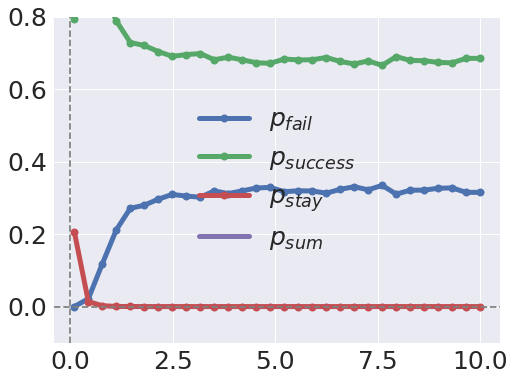

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

addition = p_fail_vector + p_success_vector  + p_stay_vector
ax.plot(sigma_out_vector, p_fail_vector, 'o-', ms=ms, lw=lw, label=r'$p_{fail}$')
ax.plot(sigma_out_vector, p_success_vector,'o-', ms=ms, lw=lw, label=r'$p_{success}$')
ax.plot(sigma_out_vector, p_stay_vector,'o-', ms=ms, lw=lw, label=r'$p_{stay}$')
ax.plot(sigma_out_vector, addition, ms=ms, lw=lw, label=r'$p_{sum}$')


ax.set_ylim([-0.1, 0.80])
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.legend();

## Systematic calculations for non-initial cue

In [33]:
%%time

sigma_max = 10.0
sigma_num = 30
n_samples = 5000
n_signals = 3
p_fail_vector = np.zeros(sigma_num)
p_stay_vector = np.zeros(sigma_num)
p_success_vector = np.zeros(sigma_num)
sigma_out_vector = np.linspace(0.1, sigma_max, sigma_num)
signals = generate_non_cued_trajectories(manager, 3)

for index, sigma_out in enumerate(sigma_out_vector):
    samples_dic = generate_samples_from_signals(manager, sigma_out, n_samples, n_signals, signals=signals)
    prob_dic = calculate_probabilities(samples_dic)
    p_fail_vector[index]= prob_dic['p_fail']
    p_stay_vector[index]= prob_dic['p_stay']
    p_success_vector[index]= prob_dic['p_success']

CPU times: user 7.21 s, sys: 72 ms, total: 7.28 s
Wall time: 3.76 s


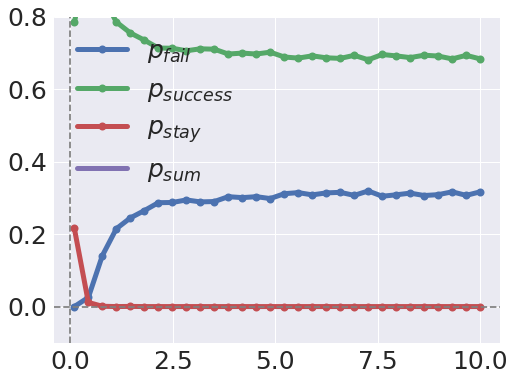

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

addition = p_fail_vector + p_success_vector  + p_stay_vector
ax.plot(sigma_out_vector, p_fail_vector, 'o-', ms=ms, lw=lw, label=r'$p_{fail}$')
ax.plot(sigma_out_vector, p_success_vector,'o-', ms=ms, lw=lw, label=r'$p_{success}$')
ax.plot(sigma_out_vector, p_stay_vector,'o-', ms=ms, lw=lw, label=r'$p_{stay}$')
ax.plot(sigma_out_vector, addition, ms=ms, lw=lw, label=r'$p_{sum}$')

ax.set_ylim([-0.1, 0.80])
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.legend();

** Let's take power of this **

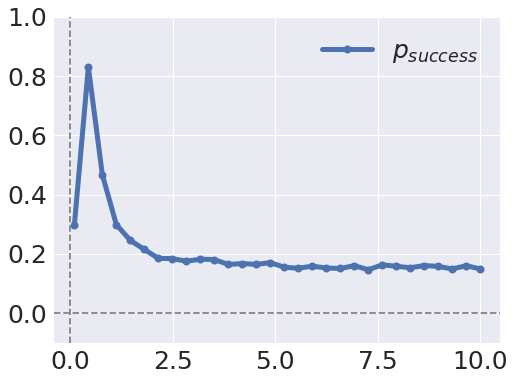

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(sigma_out_vector, np.power(p_success_vector, 5),'o-', ms=ms, lw=lw, label=r'$p_{success}$')


ax.set_ylim([-0.1, 1.0])
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.legend();

# Probability of failure for a given set of weights

# Graphical representation
Here we are going to plot the first three units current trajectories with some levels of noise

In [36]:
strict_maximum = True

g_a = 1.0
g_I = 10.0
tau_a = 0.250
G = 1.0
sigma_out = 0.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.005

hypercolumns = 1
minicolumns = 5
n_patterns = 5

# Training
ws = 1.0
wn =  0.2
wb = -20.0
alpha = 1.0

T_persistence = 0.100


# Manager properties
dt = 0.001
values_to_save = ['o', 's']

# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
                 tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
                 strict_maximum=strict_maximum, perfect=False, normalized_currents=True)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Protocol
manager.run_artificial_protocol(ws=ws, wn=wn, wb=wb ,alpha=alpha)

T_recall = 1.65
T_cue = tau_s
I_cue = 0
nr = manager.canonical_network_representation

manager.run_network_recall(T_recall=T_recall, T_cue=T_cue, I_cue=0, empty_history=True, reset=True)

s1 = manager.history['s'][:, 0]
s2 = manager.history['s'][:, 1]
s3 = manager.history['s'][:, 2]
s4 = manager.history['s'][:, 3]

In [37]:
sigma_out = 0.5
nn.sigma_in = sigma_out * np.sqrt(2 / tau_s)

n_trajectories =  50
s1_collection = []
s2_collection = []
s3_collection = []
s4_collection = []

for _ in range(n_trajectories):
    manager.run_network_recall(T_recall=T_recall, T_cue=T_cue, I_cue=0, empty_history=True, reset=True)

    s1_collection.append(np.copy(manager.history['s'][:, 0]))
    s2_collection.append(np.copy(manager.history['s'][:, 1]))
    s3_collection.append(np.copy(manager.history['s'][:, 2]))
    s4_collection.append(np.copy(manager.history['s'][:, 3]))

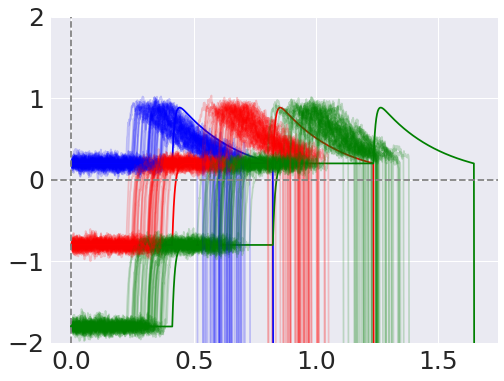

In [38]:
alpha = 0.2

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(manager.time, s1)
ax.plot(manager.time, s2, color='blue')
ax.plot(manager.time, s3, color='red')
ax.plot(manager.time, s4, color='green')

for index in range(n_trajectories):
    ax.plot(manager.time, s2_collection[index], color='blue', alpha=alpha)
    ax.plot(manager.time, s3_collection[index], color='red', alpha=alpha)
    ax.plot(manager.time, s4_collection[index], color='green', alpha=alpha)


ax.set_ylim([-2.0, 2.0])
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');
